# Final Evaluation
data are from ./data

In [3]:
%pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## style
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [5]:
def load_all_results():
    # find the path of the data file
    paths_to_check = ["./results", "../results"]
    data_dir = None
    for p in paths_to_check:
        if os.path.exists(p):
            data_dir = p
            break
            
    if data_dir is None:
        print("Error: Could not find data directory!")
        return {}

    # Name the four models to be compared
    models_config = {
        "sm": {"file": "en_core_web_sm_results.json", "label": "Small (sm)"},
        "md": {"file": "en_core_web_md_results.json", "label": "Medium (md)"},
        "lg": {"file": "en_core_web_lg_results.json", "label": "Large (lg)"},
        "trf": {"file": "transformer_results.json", "label": "Transformer (trf)"}
    }

    results = {}
    
    for key, config in models_config.items():
        path = os.path.join(data_dir, config["file"])
        if os.path.exists(path):
            with open(path, 'r') as f:
                results[key] = json.load(f)
            # save label and used in graph
            results[key]['label'] = config['label']
            print(f" Loaded: {config['file']}")
        else:
            print(f" Warning: {config['file']} not found.")
            results[key] = None
            
    return results

# load data
all_results = load_all_results()

 Loaded: en_core_web_sm_results.json
 Loaded: en_core_web_md_results.json
 Loaded: en_core_web_lg_results.json
 Loaded: transformer_results.json


In [6]:
def plot_model_comparison(results, metric_path, title, ylabel, ylim=None):
    # extract the data
    models = ['sm', 'md', 'lg', 'trf']
    labels = []
    values = []
    colors = ['#bdd7ee', '#6baed6', '#2171b5', '#f03b20']
    
    for model_key in models:
        data = results.get(model_key)
        if data:
            labels.append(data['label'])
            # loop obtain values (example: data['ner']['f1'])
            val = data
            try:
                for key in metric_path:
                    val = val.get(key, 0)
            except:
                val = 0
            values.append(val)
        else:
            labels.append(model_key)
            values.append(0)
        
    fig, ax = plt.subplots(figsize=(8, 6))
    x = np.arange(len(labels))
    bars = ax.bar(x, values, width=0.6, color=colors, edgecolor='grey')
    
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    if ylim:
        ax.set_ylim(ylim)
        
    # label the value on the bar 
    for bar in bars:
        height = bar.get_height()
        fmt = '{:.2f}' if height < 10 else '{:.0f}'
        ax.annotate(fmt.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

print("graph is ready.")

graph is ready.


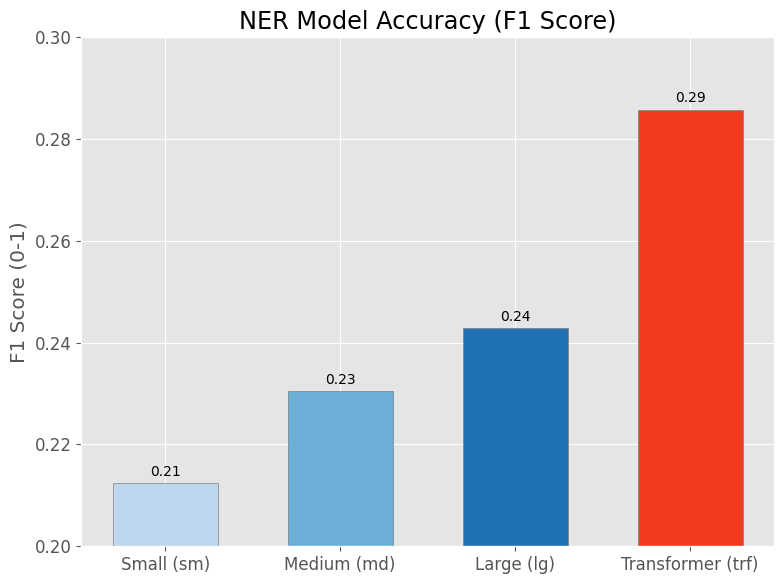

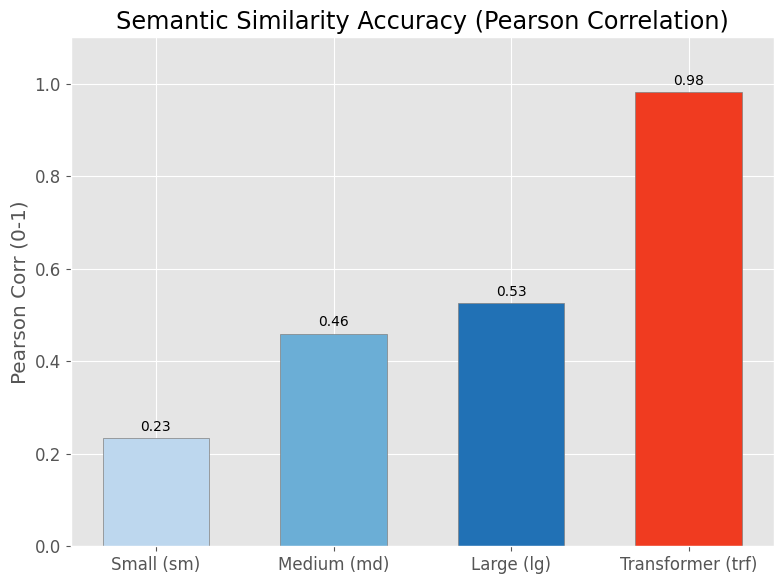

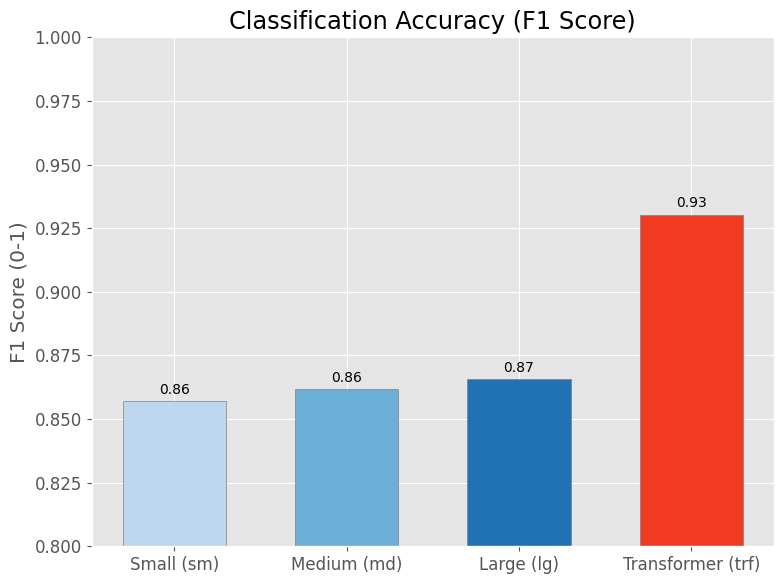

In [7]:
# 1. NER Accuracy
plot_model_comparison(all_results, ('ner', 'f1'), 
                      'NER Model Accuracy (F1 Score)', 'F1 Score (0-1)', ylim=(0.2, 0.3))

# 2. Similarity Accuracy
plot_model_comparison(all_results, ('similarity', 'pearson'), 
                      'Semantic Similarity Accuracy (Pearson Correlation)', 'Pearson Corr (0-1)', ylim=(0, 1.1))

# 3. Classification Accuracy
plot_model_comparison(all_results, ('classification', 'f1'), 
                      'Classification Accuracy (F1 Score)', 'F1 Score (0-1)', ylim=(0.8, 1.0))

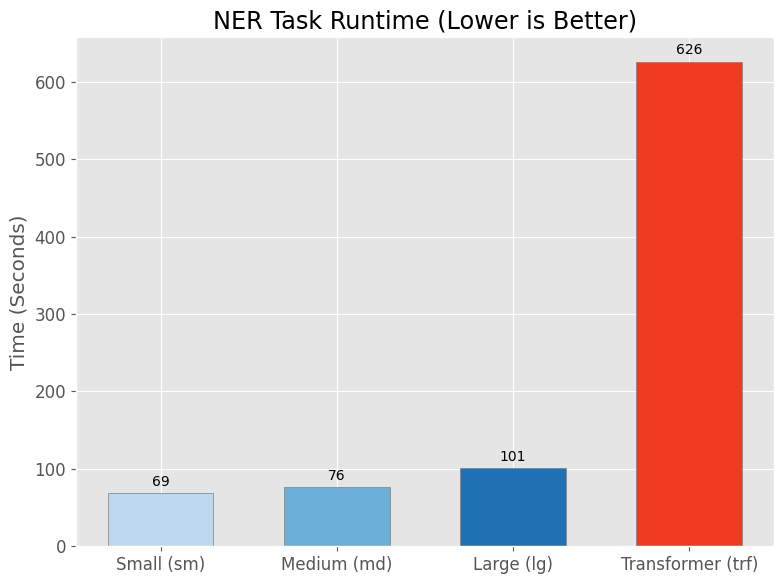

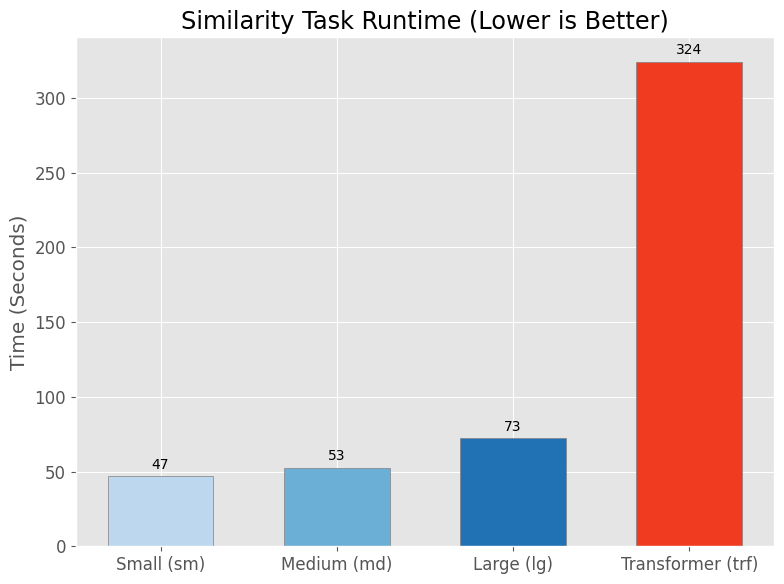

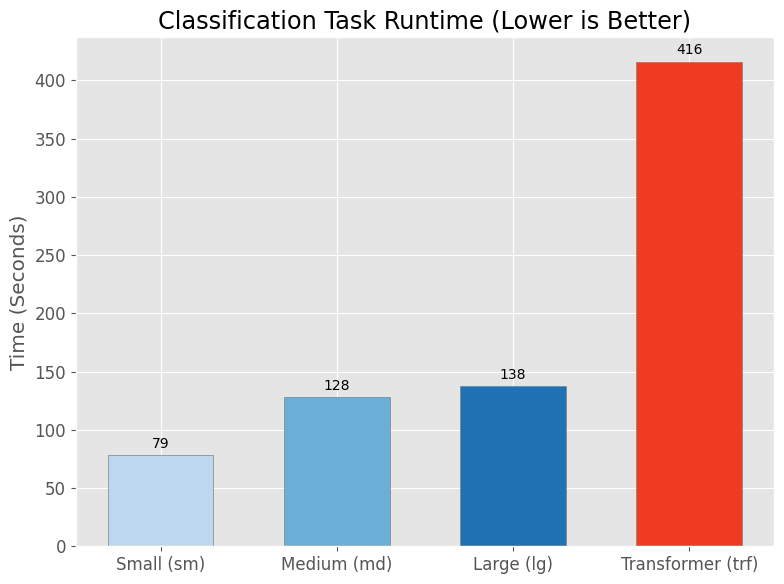

In [8]:
# 1. NER Runtime
plot_model_comparison(all_results, ('ner', 'runtime_sec'), 
                      'NER Task Runtime (Lower is Better)', 'Time (Seconds)')

# 2. Similarity Runtime
plot_model_comparison(all_results, ('similarity', 'runtime_sec'), 
                      'Similarity Task Runtime (Lower is Better)', 'Time (Seconds)')

# 3. Classification Runtime
plot_model_comparison(all_results, ('classification', 'runtime_sec'), 
                      'Classification Task Runtime (Lower is Better)', 'Time (Seconds)')

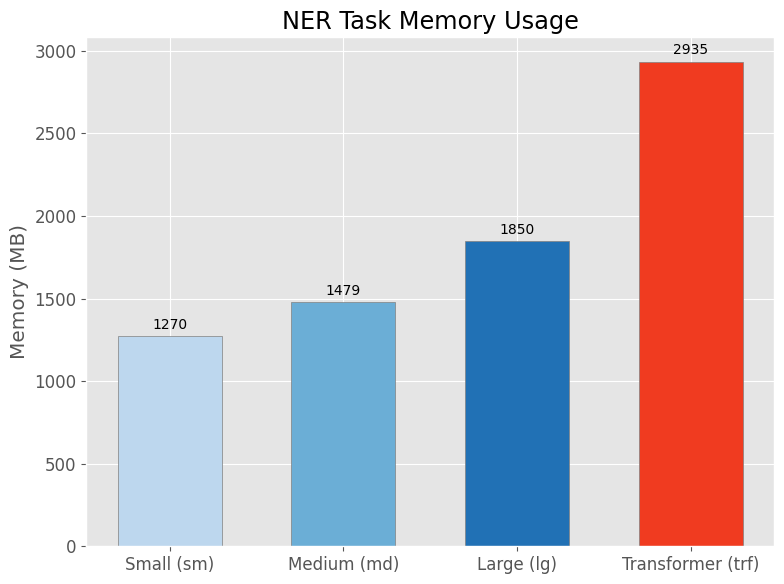

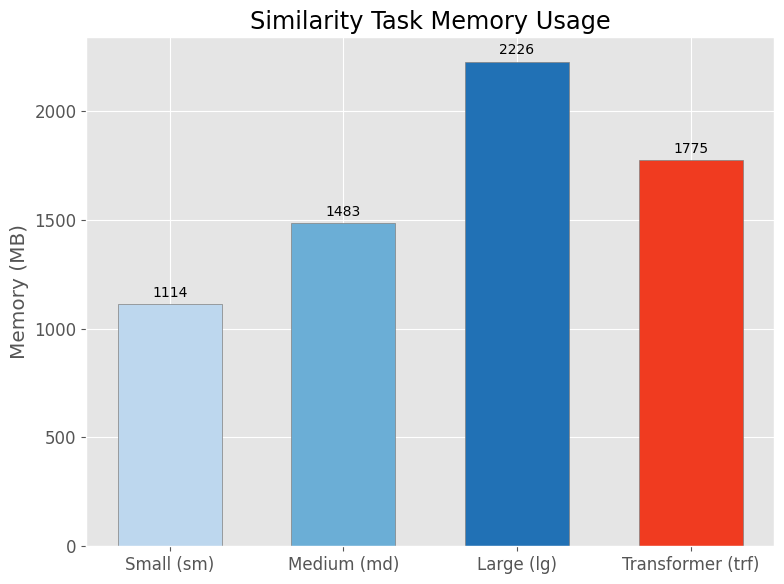

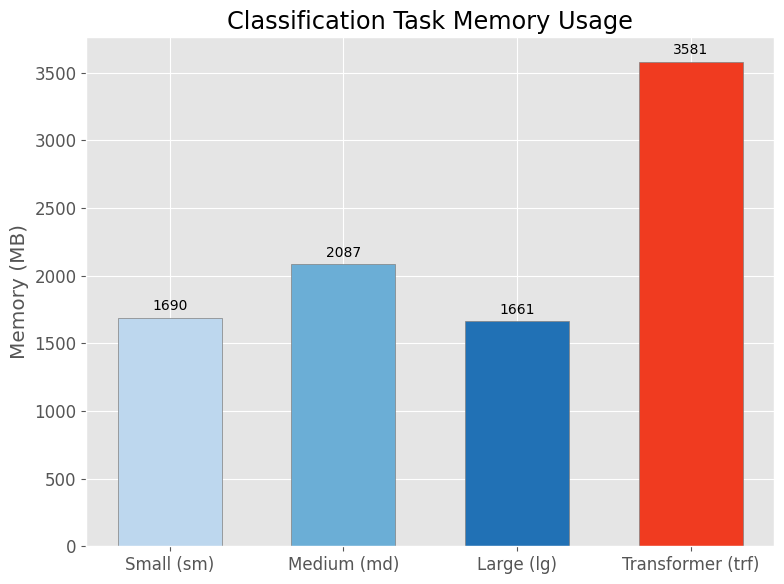

In [10]:
# 1. NER Memory
plot_model_comparison(all_results, ('ner', 'memory_mb'), 
                      'NER Task Memory Usage', 'Memory (MB)')

# 2. Similarity Memory
plot_model_comparison(all_results, ('similarity', 'memory_mb'), 
                      'Similarity Task Memory Usage', 'Memory (MB)')

# 3. Classification Memory
plot_model_comparison(all_results, ('classification', 'memory_mb'), 
                      'Classification Task Memory Usage', 'Memory (MB)')